In [1]:
#Initialization of used libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
#Task 1. Initialization of given functions
def x_cube(input):
    return input ** 3
def x_abs(input):
    return abs(input - 0.2)
def x_sin(input):
    x = input * np.sin(1 / input)
    return x

In [3]:
#1.1 Brute force method
def brute_force(function):
    list1 = []
    N = 0
    if str(function.__name__) == 'x_sin':
        for i in range (0, 1001):
            N += 1
            list1.append(function(0.99 / 1000 * i + 0.01))
    else:
        for i in range (0, 1001):
            N += 1
            list1.append(function(i / 1000))
    return min(list1), len(list1), N

x = brute_force(x_cube)
y = brute_force(x_abs)
z = brute_force(x_sin)
print('(min, f-calculations, N of iterations) for 3 given functions:',x,y,z)

(min, f-calculations, N of iterations) for 3 given functions: (0.0, 1001, 1001) (0.0, 1001, 1001) (-0.21722960129123117, 1001, 1001)


In [4]:
#1.2 Dichotomy method
def dichotomy(function, a, b):
    beta = 0.0009
    s = 0
    N = 0
    while abs(a-b) >= 0.001:
        N += 1
        s += 2
        x1 = (a + b - beta) / 2
        x2 = (a + b + beta) / 2
        if function(x1) <= function(x2):
            b = x2
        else:
            a = x1
    return function((a + b) / 2), s + 1, N

x = dichotomy(x_cube, 0, 1)
y = dichotomy(x_abs, 0, 1)
z = dichotomy(x_sin, 0.01, 1)
print('(min, f-calculations, N of iterations) for 3 given functions:',x,y,z)

(min, f-calculations, N of iterations) for 3 given functions: (1.1093111164523245e-10, 29, 14) (7.785034179669248e-06, 29, 14) (-0.2172336224666543, 29, 14)


In [5]:
#1.3 Golden section method
def golden(function, a, b):
    s = 0
    N = 0
    x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
    x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
    while abs(a-b) >= 0.001:
        N += 1
        s += 1
        if function(x1) <= function(x2):
            b = x2
            x2 = x1
            x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
        else:
            a = x1
            x1 = x2
            x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
    return function((a + b) / 2), s + 3, N

x = golden(x_cube, 0, 1)
y = golden(x_abs, 0, 1)
z = golden(x_sin, 0.01, 1)
print('(min, f-calculations, N of iterations) for 3 given functions:',x,y,z)

(min, f-calculations, N of iterations) for 3 given functions: (4.9256800857728296e-11, 18, 15) (7.331374358568454e-05, 18, 15) (-0.21723232817753246, 18, 15)


In [8]:
#Task 2. Initialization of X and Y dots coordinates
alpha = random.uniform (0, 1)
beta = random.uniform (0, 1)

xk = []
for i in range(0, 101):
    xk.append(i/100)
xk = np.array(xk)

yk =[]
for i in xk:
    yk.append(alpha * i + beta + random.normalvariate(0.5, 0.125))

[a,b] = [0.9543989405948267, 0.8700304022121872]


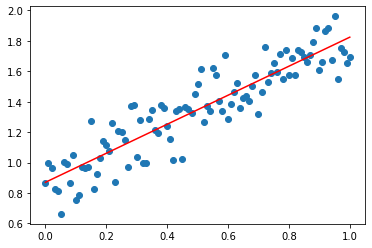

In [9]:
#Test calculation of minimum, using np.linalg.lstsq
A = np.vstack([xk, np.ones(len(xk))]).T
a, b = np.linalg.lstsq(A, yk, rcond=None)[0]

plt.scatter(xk, yk)
plt.plot(xk, a*xk+b, 'r')
print('[a,b] =',[a, b])

[a, b, f-calculations, N of iterations] = [0.954, 0.87, 1002001, 1002001]


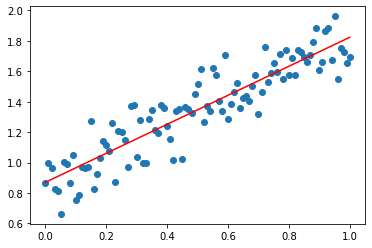

In [10]:
#2.1.1 Exhaustive search for linear function
list1 = []
for a in range(0, 1001):
    a = a / 1000
    for b in range(0, 1001):
        b = b / 1000
        s = 0
        for k in range(0, 101):
            s += (a * xk[k] + b - yk[k]) ** 2
        list1.append([s, a, b])

minimum = min(x[0] for x in list1)
for sublist in list1:
    if sublist[0] == minimum:
        a = sublist[1]
        b = sublist[2]
        break
    
exh_lin = [a,b]
plt.scatter(xk,yk)
plt.plot(xk, a*xk+b, 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, 1001*1001, 1001*1001],)

[a,b, f-calculations, N of iterations] = [0.989, -0.481, 1000000, 1000000]


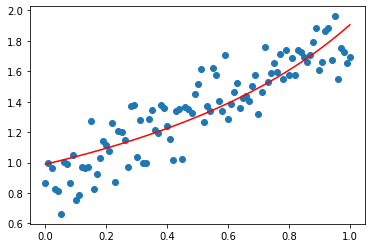

In [11]:
#2.1.2 Exhaustive search for rational function
list2 = []
for a in range(0, 1000):
    a = a / 1000
    for b in range(0, 1000):
        b = -b / 1000
        s = 0
        for k in range(0, 101):
            s += (a / (1 + b * xk[k]) - yk[k]) ** 2
        list2.append([s, a, b])

minimum = min(x[0] for x in list2)
for sublist in list2:
    if sublist[0] == minimum:
        a = sublist[1]
        b = sublist[2]
        break

exh_rat = [a,b]
plt.scatter(xk,yk)
plt.plot(xk, a / (1 + b * xk), 'r')

print('[a,b, f-calculations, N of iterations] =',[a, b, 1000 ** 2, 1000 ** 2])

[a,b, f-calculations, N of iterations] = [0.956, 0.869, 22022, 22]


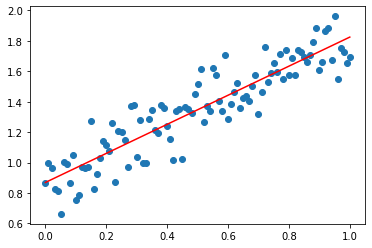

In [25]:
#2.2.1 Gauss (coordinate descent) method for linear function
a1 = 0.05
b1 = 0.05
b1_temp = 10000
N = 0
f_calc = 0
while 0 == 0:
    N += 2
    list1 = []
    for a in range(0, 1001):
        f_calc += 1
        a = a / 1000
        s = 0
        for k in range(0, 101):
            s += (a * xk[k] + b1 - yk[k]) ** 2
        list1.append(s)
    a1_temp = list1.index(min(list1)) / 1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    list2 = []
    for b in range(0, 1001):
        f_calc += 1
        b = b / 1000
        s = 0
        for k in range(0, 101):
            s += (a1 * xk[k] + b - yk[k]) ** 2
        list2.append(s)
    b1_temp = list2.index(min(list2)) / 1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

gs_lin = [a1,b1]
plt.scatter(xk,yk)
plt.plot(xk, a1*xk+b1, 'r')

print('[a,b, f-calculations, N of iterations] =',[a1, b1, f_calc, N])

[a, b, f-calculations, N of iterations] = [0.991, -0.479, 14000, 14]


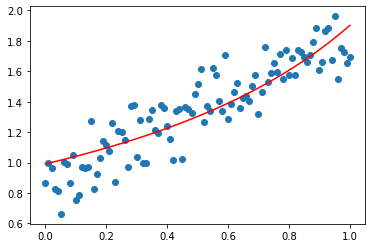

In [26]:
#2.2.2 Gauss (coordinate descent) method for rational function
a1 = 0.05
b1 = -0.05
b1_temp = 10000
N = 0
f_calc = 0
while 0 == 0:
    N += 2
    list1 = []
    for a in range(0, 1000):
        f_calc += 1
        a = a / 1000
        s = 0
        for k in range(0, 101):
            s += (a / (1 + b1 * xk[k]) - yk[k]) ** 2
        list1.append(s)
    a1_temp = list1.index(min(list1)) / 1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    list2 = []
    for b in range(0, 1000):
        f_calc += 1
        b = -b / 1000
        s = 0
        for k in range(0, 101):
            s += (a1 / (1 + b * xk[k]) - yk[k]) ** 2
        list2.append(s)
    b1_temp = list2.index(min(list2)) / -1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

gs_rat = [a1,b1]
plt.scatter(xk,yk)
plt.plot(xk, a1 / (1 + b1 * xk), 'r')

print('[a, b, f-calculations, N of iterations] =',[a1, b1, f_calc, N])

Optimization terminated successfully.
         Current function value: 1.633014
         Iterations: 39
         Function evaluations: 73
[a, b] = [0.95426041 0.86995788]


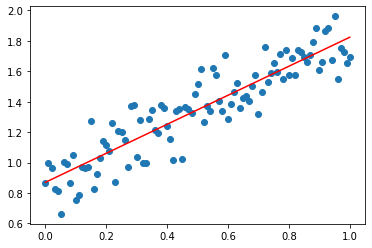

In [14]:
#2.3.1 Nelder-Mead method for linear function
from scipy.optimize import minimize

def fun(ab):
    a, b = ab
    s = 0
    for k in range(0, 101):
        s += (a * xk[k] + b - yk[k]) ** 2
    return s

result = minimize(fun,[0.3, 0.3], method='nelder-mead', options={'xatol': 0.001,'disp': True})

nm_lin = result.x
print ('[a, b] =',result.x)
plt.scatter(xk,yk)
plt.plot(xk, result.x[0] * xk + result.x[1], 'r')

Optimization terminated successfully.
         Current function value: 2.035200
         Iterations: 26
         Function evaluations: 51
[a, b] = [ 0.98856136 -0.48115791]


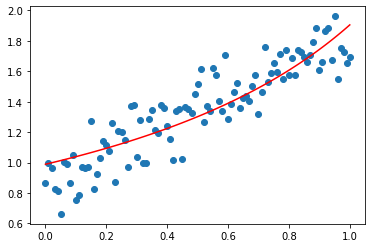

In [15]:
#2.3.2 Nelder-Mead method for rational function
def fun(ab):
    a, b = ab
    s = 0
    for k in range(0, 101):
        s += (a / (1 + b * xk[k]) - yk[k]) ** 2
    return s

result = minimize(fun,[0.3, 0.3], method='nelder-mead', options={'xatol': 0.001,'disp': True})

nm_rat = result.x
print ('[a, b] =', result.x)
plt.scatter(xk,yk)
plt.plot(xk, result.x[0] / (1 + result.x[1] * xk), 'r')

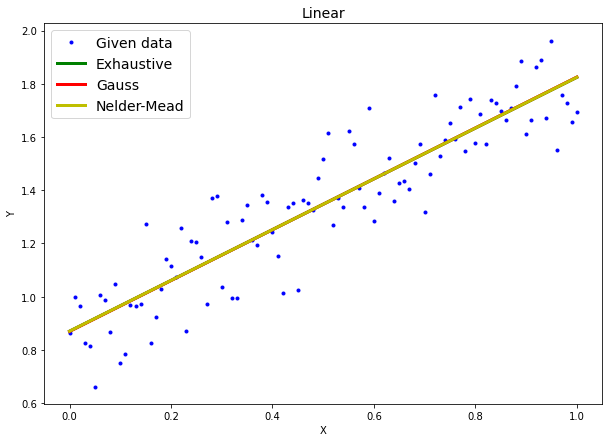

In [27]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, exh_lin[0]*xk + exh_lin[1], 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_lin[0]*xk + gs_lin[1], 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_lin[0]*xk + nm_lin[1], 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)

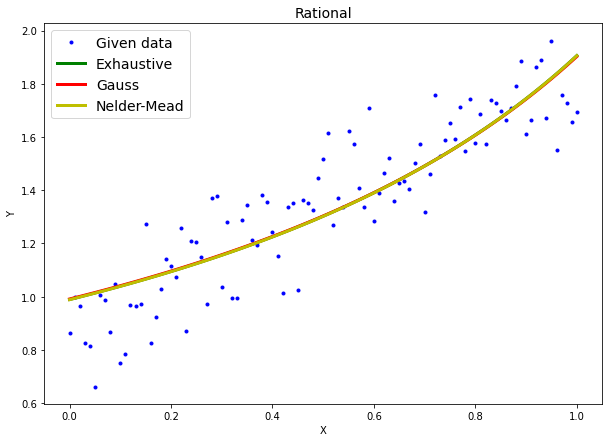

In [29]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, exh_rat[0] / (1 + exh_rat[1]*xk), 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_rat[0] / (1 + gs_rat[1]*xk), 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_rat[0] / (1 + nm_rat[1]*xk), 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)